In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import LinearAxis, Range1d
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 1. Download, extract and load CIFAR10 image dataset using torchvision


### Loading the dataset

# PyTorch has an integrated CIFAR10 dataset (in the torchvision package) which we can use via the DataLoader functionality.

# Hyperparameters
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Adjust Path for your Directory
DATA_PATH = "C:/Users/User/Downloads/CIFAR10Data"
MODEL_STORE_PATH = "C:/Users/User/Downloads/ModelC"

# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.CIFAR10(root=DATA_PATH, train=False, transform=trans)

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified


In [17]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 6


tensor([[[ 0.3268,  0.1231,  0.2122,  ...,  1.5868,  1.5105,  1.4596],
         [-0.2206, -0.4242, -0.1951,  ...,  1.1414,  1.0904,  1.1286],
         [-0.1060, -0.2206,  0.1995,  ...,  1.0777,  1.1032,  0.9632],
         ...,
         [ 2.2233,  2.1342,  2.0960,  ...,  1.6123,  0.2886,  0.2504],
         [ 1.8669,  1.7778,  1.9432,  ...,  1.9178,  0.8104,  0.6322],
         [ 1.8287,  1.7141,  1.8541,  ...,  2.3251,  1.4978,  1.1414]],

        [[ 0.3649,  0.1613,  0.1867,  ...,  1.2559,  1.1668,  1.1541],
         [-0.1696, -0.4242, -0.3224,  ...,  0.6959,  0.6322,  0.6831],
         [-0.1187, -0.3351, -0.0806,  ...,  0.6450,  0.6450,  0.5049],
         ...,
         [ 1.7396,  1.5232,  1.6250,  ...,  1.2686, -0.0296,  0.0085],
         [ 1.3450,  1.1414,  1.4087,  ...,  1.4596,  0.3649,  0.2504],
         [ 1.4087,  1.2177,  1.3832,  ...,  1.9178,  1.0777,  0.7468]],

        [[ 0.3777,  0.1486,  0.1231,  ...,  0.9504,  0.8741,  0.8868],
         [-0.1696, -0.4242, -0.4242,  ...,  0

In [18]:
print(train_dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
# 2. Show random batches of images in a grid using torchvision.utils.make_grid
from torchvision.utils import make_grid

def show_batch(loader):
    for images, labels in loader:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


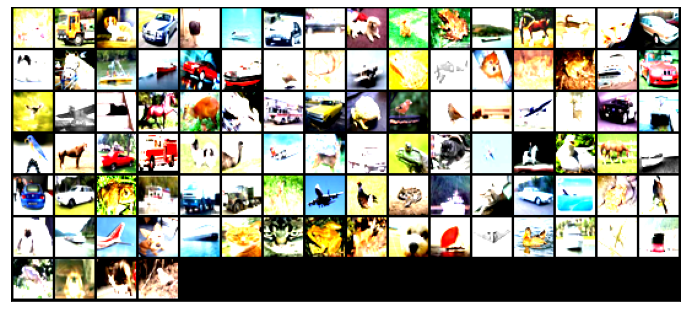

In [20]:
show_batch(train_loader)

In [27]:
# 3. Create a convolutional neural network using with nn.Conv2d and nn.MaxPool2d layers

# Convolutional neural network (two convolutional layers)

class ConvNet(nn.Module):    
  def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
  def forward(self, xb): 
      return self.network(xb)




In [28]:
model = ConvNet()
model

ConvNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

In [29]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
# 4. Train a convolutional neural network and visualize the losses and errors

# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/10], Step [100/500], Loss: 1.8906, Accuracy: 29.00%
Epoch [1/10], Step [200/500], Loss: 1.6330, Accuracy: 38.00%
Epoch [1/10], Step [300/500], Loss: 1.6216, Accuracy: 41.00%
Epoch [1/10], Step [400/500], Loss: 1.2782, Accuracy: 51.00%
Epoch [1/10], Step [500/500], Loss: 1.0974, Accuracy: 63.00%
Epoch [2/10], Step [100/500], Loss: 1.2004, Accuracy: 57.00%
Epoch [2/10], Step [200/500], Loss: 0.9809, Accuracy: 62.00%
Epoch [2/10], Step [300/500], Loss: 1.1980, Accuracy: 60.00%
Epoch [2/10], Step [400/500], Loss: 1.0255, Accuracy: 63.00%
Epoch [2/10], Step [500/500], Loss: 0.7808, Accuracy: 72.00%
Epoch [3/10], Step [100/500], Loss: 0.7594, Accuracy: 74.00%
Epoch [3/10], Step [200/500], Loss: 0.8664, Accuracy: 70.00%
Epoch [3/10], Step [300/500], Loss: 0.7674, Accuracy: 75.00%
Epoch [3/10], Step [400/500], Loss: 0.5957, Accuracy: 78.00%
Epoch [3/10], Step [500/500], Loss: 0.8523, Accuracy: 68.00%
Epoch [4/10], Step [100/500], Loss: 0.6713, Accuracy: 72.00%
Epoch [4/10], Step [200/

In [34]:
# 5. Understand overfitting and the strategies for avoiding it

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

p = figure(y_axis_label='Loss', width=850, y_range=(0, 1), title='PyTorch ConvNet results')
p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}
p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')
p.line(np.arange(len(loss_list)), loss_list)
p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')
show(p)


Test Accuracy of the model on the 10000 test images: 77.41 %


In [35]:
show(p)

as can be seen from training data results, model achieves almost 94% accuracy, but in the test test only 77,41%. This result indicates overfitting. It would be better to use regularization techniques and use more complicated model with more convolutional layers.


In [46]:
# 6. Generate predictions on single images from the test set
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

test_loader.ImageFolder(transform=ToTensor())

AttributeError: ignored

In [56]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: cat , Predicted: cat


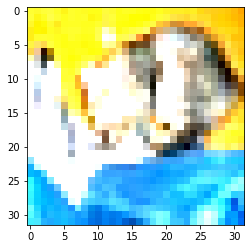

In [57]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: ship , Predicted: ship


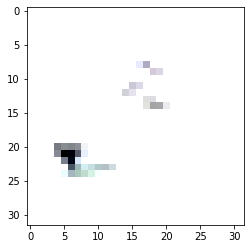

In [59]:
img, label = test_dataset[1205]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bird , Predicted: bird


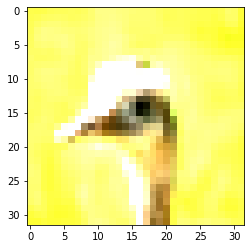

In [60]:
img, label = test_dataset[765]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_dataset.classes[label], ', Predicted:', predict_image(img, model))

In [63]:
# 7. Save and load model for further purposes
torch.save(model.state_dict(), MODEL_STORE_PATH)

In [64]:
model.load_state_dict(torch.load(MODEL_STORE_PATH))
model.eval()

ConvNet(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102